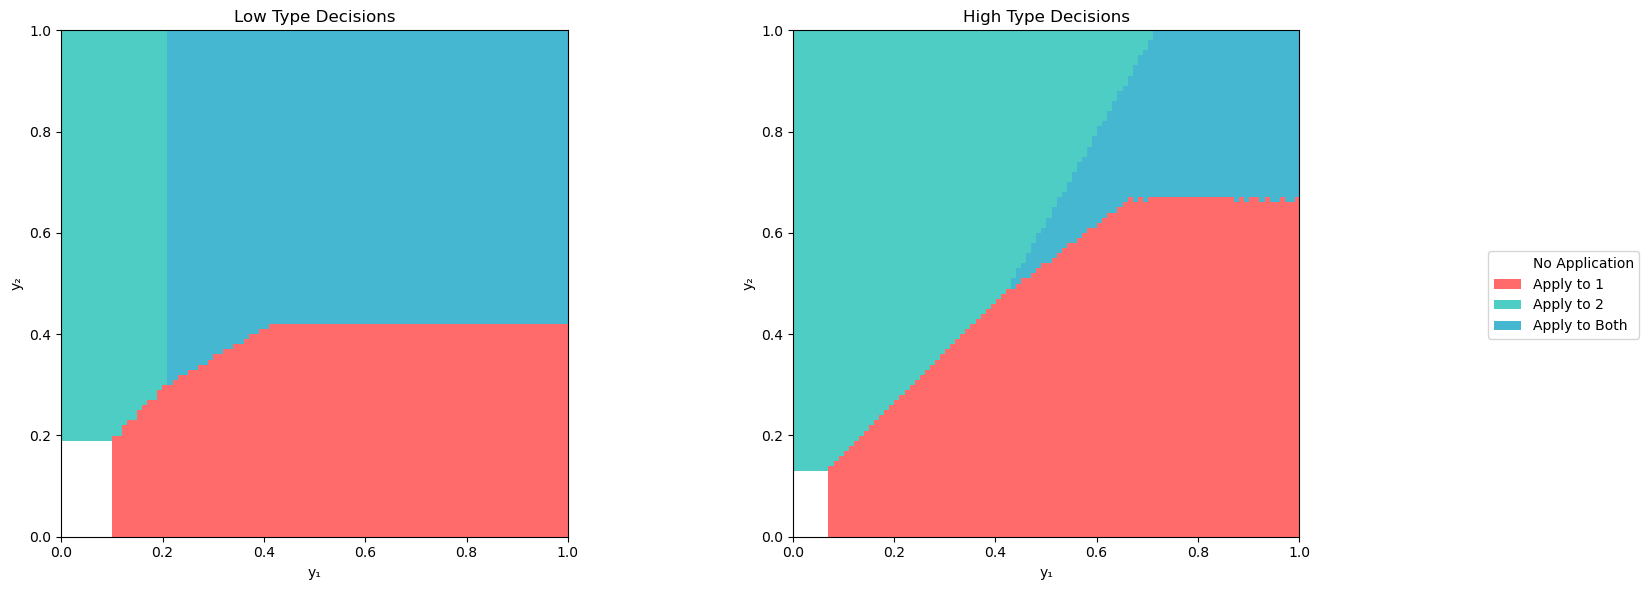

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Parameters
theta_x = 0.8
s_1 = 0.05
s_2 = 0.1
prob = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]  # [p_0, p_1, p_2, q_0, q_1, q_2]

# Create grid
y1_dom = np.linspace(0, 1, 100)
y2_dom = np.linspace(0, 1, 100)
y1_mesh, y2_mesh = np.meshgrid(y1_dom, y2_dom)

# Low types
p_0, p_1, p_2, q_0, q_1, q_2 = prob

u_0_l = y1_mesh * 0
u_1_l = theta_x * ((1 - q_2 - q_0) * 0 + (q_2 + q_0) * y1_mesh) + (1 - theta_x) * ((1 - p_2 - p_0) * y1_mesh/2 + (p_2 + p_0) * y1_mesh) - s_1
u_2_l = theta_x * ((1 - q_1 - q_0) * 0 + (q_1 + q_0) * y2_mesh) + (1 - theta_x) * ((1 - p_1 - p_0) * y2_mesh/2 + (p_1 + p_0) * y2_mesh) - s_2
u_b_l = ((y1_mesh > y2_mesh) * 
         (theta_x * (q_0 * y1_mesh + q_1 * y2_mesh + q_2 * y1_mesh + (1 - q_0 - q_1 - q_2) * (0)) + 
          (1 - theta_x) * (p_0 * y1_mesh + p_1 * (y1_mesh / 2 + y2_mesh / 2) + p_2 * (y1_mesh) + (1 - p_0 - p_1 - p_2) * (y1_mesh/2 + y2_mesh/4))
         ) +
         (y1_mesh <= y2_mesh) * 
         (theta_x * (q_0 * y2_mesh + q_1 * y2_mesh + q_2 * y1_mesh + (1 - q_0 - q_1 - q_2) * (0)) + 
          (1 - theta_x) * (p_0 * y2_mesh + p_1 * y2_mesh + p_2 * (y1_mesh / 2 + y2_mesh / 2) + (1 - p_0 - p_1 - p_2) * (y2_mesh/2 + y1_mesh/4))
         )) - s_1 - s_2

# High types
u_0_h = y1_mesh * 0
u_1_h = theta_x * ((1 - q_2 - q_0) * y1_mesh/2 + (q_2 + q_0) * y1_mesh) + (1 - theta_x) * y1_mesh - s_1
u_2_h = theta_x * ((1 - q_1 - q_0) * y2_mesh/2 + (q_1 + q_0) * y2_mesh) + (1 - theta_x) * y2_mesh - s_2
u_b_h = ((y1_mesh > y2_mesh) * 
         (theta_x * (q_0 * y1_mesh + q_1 * (y1_mesh/2 + y2_mesh/2) + q_2 * y1_mesh + (1 - q_0 - q_1 - q_2) * (y1_mesh/2 + y2_mesh/4)) + 
          (1 - theta_x) * y1_mesh
         ) +
         (y1_mesh <= y2_mesh) * 
         (theta_x * (q_0 * y2_mesh + q_1 * (y2_mesh/2 + y1_mesh/2) + q_2 * y1_mesh + (1 - q_0 - q_1 - q_2) * (y2_mesh/2 + y1_mesh/4)) + 
          (1 - theta_x) * y2_mesh
         )) - s_1 - s_2

# Stack matrices and find decision regions
low_type_stack = np.stack([u_0_l, u_1_l, u_2_l, u_b_l])
high_type_stack = np.stack([u_0_h, u_1_h, u_2_h, u_b_h])

low_type_decisions = np.argmax(low_type_stack, axis=0)
high_type_decisions = np.argmax(high_type_stack, axis=0)

# Create discrete colormap
colors = ['#FFFFFF', '#FF6B6B', '#4ECDC4', '#45B7D1'] 
cmap = ListedColormap(colors)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot low type decisions
im1 = ax1.imshow(low_type_decisions, extent=[0, 1, 0, 1], origin='lower', cmap=cmap)
ax1.set_title('Low Type Decisions')
ax1.set_xlabel('y₁')
ax1.set_ylabel('y₂')

# Plot high type decisions
im2 = ax2.imshow(high_type_decisions, extent=[0, 1, 0, 1], origin='lower', cmap=cmap)
ax2.set_title('High Type Decisions')
ax2.set_xlabel('y₁')
ax2.set_ylabel('y₂')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors[0], label='No Application'),
    Patch(facecolor=colors[1], label='Apply to 1'),
    Patch(facecolor=colors[2], label='Apply to 2'),
    Patch(facecolor=colors[3], label='Apply to Both')
]

# Add legend
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()

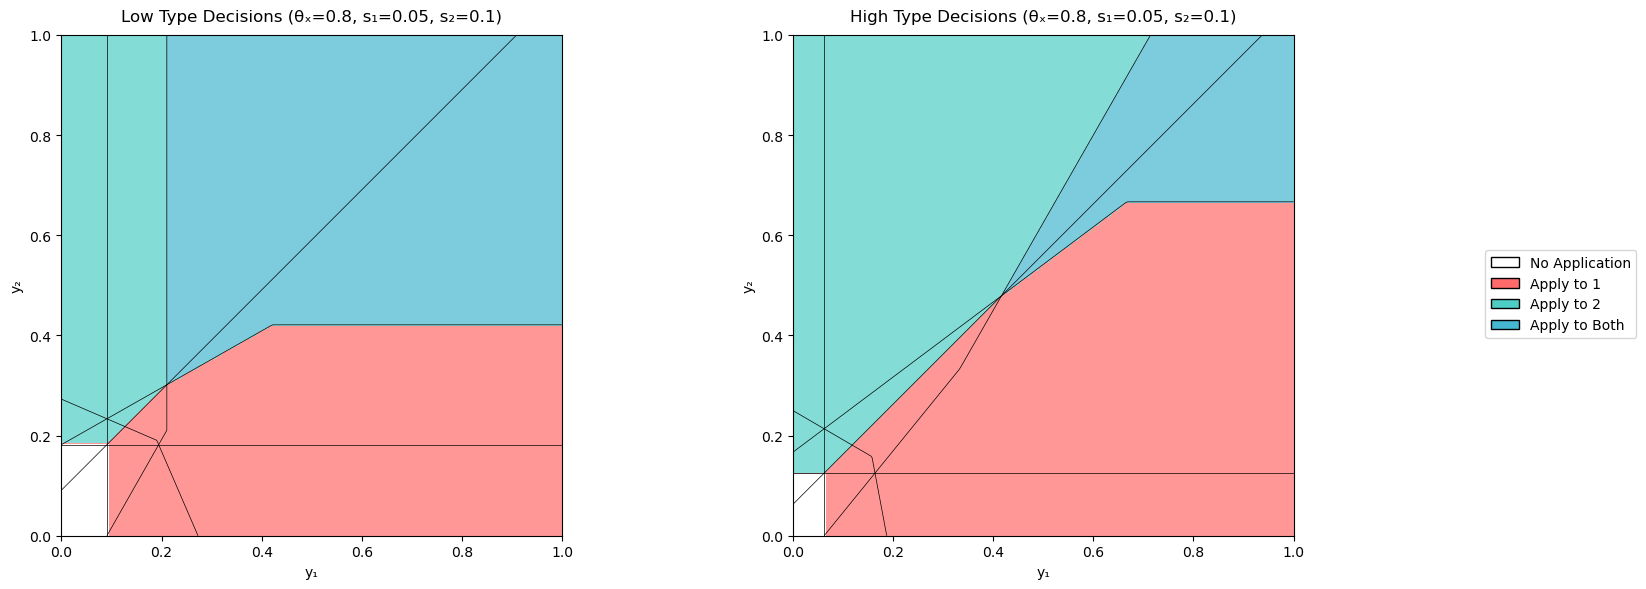

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Updated Parameters
theta_x = 0.8
s_1 = 0.05
s_2 = 0.1
prob = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]  # [p_0, p_1, p_2, q_0, q_1, q_2]

# Create grid
y1_dom = np.linspace(0, 1, 200)  # Increased resolution
y2_dom = np.linspace(0, 1, 200)
y1_mesh, y2_mesh = np.meshgrid(y1_dom, y2_dom)

# Low types
p_0, p_1, p_2, q_0, q_1, q_2 = prob

u_0_l = y1_mesh * 0
u_1_l = theta_x * ((1 - q_2 - q_0) * 0 + (q_2 + q_0) * y1_mesh) + (1 - theta_x) * ((1 - p_2 - p_0) * y1_mesh/2 + (p_2 + p_0) * y1_mesh) - s_1
u_2_l = theta_x * ((1 - q_1 - q_0) * 0 + (q_1 + q_0) * y2_mesh) + (1 - theta_x) * ((1 - p_1 - p_0) * y2_mesh/2 + (p_1 + p_0) * y2_mesh) - s_2
u_b_l = ((y1_mesh > y2_mesh) * 
         (theta_x * (q_0 * y1_mesh + q_1 * y2_mesh + q_2 * y1_mesh + (1 - q_0 - q_1 - q_2) * (0)) + 
          (1 - theta_x) * (p_0 * y1_mesh + p_1 * (y1_mesh / 2 + y2_mesh / 2) + p_2 * (y1_mesh) + (1 - p_0 - p_1 - p_2) * (y1_mesh/2 + y2_mesh/4))
         ) +
         (y1_mesh <= y2_mesh) * 
         (theta_x * (q_0 * y2_mesh + q_1 * y2_mesh + q_2 * y1_mesh + (1 - q_0 - q_1 - q_2) * (0)) + 
          (1 - theta_x) * (p_0 * y2_mesh + p_1 * y2_mesh + p_2 * (y1_mesh / 2 + y2_mesh / 2) + (1 - p_0 - p_1 - p_2) * (y2_mesh/2 + y1_mesh/4))
         )) - s_1 - s_2

# High types
u_0_h = y1_mesh * 0
u_1_h = theta_x * ((1 - q_2 - q_0) * y1_mesh/2 + (q_2 + q_0) * y1_mesh) + (1 - theta_x) * y1_mesh - s_1
u_2_h = theta_x * ((1 - q_1 - q_0) * y2_mesh/2 + (q_1 + q_0) * y2_mesh) + (1 - theta_x) * y2_mesh - s_2
u_b_h = ((y1_mesh > y2_mesh) * 
         (theta_x * (q_0 * y1_mesh + q_1 * (y1_mesh/2 + y2_mesh/2) + q_2 * y1_mesh + (1 - q_0 - q_1 - q_2) * (y1_mesh/2 + y2_mesh/4)) + 
          (1 - theta_x) * y1_mesh
         ) +
         (y1_mesh <= y2_mesh) * 
         (theta_x * (q_0 * y2_mesh + q_1 * (y2_mesh/2 + y1_mesh/2) + q_2 * y1_mesh + (1 - q_0 - q_1 - q_2) * (y2_mesh/2 + y1_mesh/4)) + 
          (1 - theta_x) * y2_mesh
         )) - s_1 - s_2

# Stack matrices and find decision regions
low_type_stack = np.stack([u_0_l, u_1_l, u_2_l, u_b_l])
high_type_stack = np.stack([u_0_h, u_1_h, u_2_h, u_b_h])

low_type_decisions = np.argmax(low_type_stack, axis=0)
high_type_decisions = np.argmax(high_type_stack, axis=0)

# Create utility difference matrices for boundaries
low_type_diffs = []
high_type_diffs = []

for i in range(4):
    for j in range(i+1, 4):
        low_type_diffs.append(low_type_stack[i] - low_type_stack[j])
        high_type_diffs.append(high_type_stack[i] - high_type_stack[j])

# Create discrete colormap with contrasting colors
colors = ['#FFFFFF', '#FF6B6B', '#4ECDC4', '#45B7D1']  # White, Red, Turquoise, Blue
cmap = ListedColormap(colors)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot low type decisions with boundaries
im1 = ax1.imshow(low_type_decisions, extent=[0, 1, 0, 1], origin='lower', cmap=cmap, alpha=0.7)
for diff in low_type_diffs:
    ax1.contour(y1_dom, y2_dom, diff, levels=[0], colors='black', linewidths=0.5)
ax1.set_title('Low Type Decisions (θₓ=0.8, s₁=0.05, s₂=0.1)', fontsize=12, pad=10)
ax1.set_xlabel('y₁', fontsize=10)
ax1.set_ylabel('y₂', fontsize=10)

# Plot high type decisions with boundaries
im2 = ax2.imshow(high_type_decisions, extent=[0, 1, 0, 1], origin='lower', cmap=cmap, alpha=0.7)
for diff in high_type_diffs:
    ax2.contour(y1_dom, y2_dom, diff, levels=[0], colors='black', linewidths=0.5)
ax2.set_title('High Type Decisions (θₓ=0.8, s₁=0.05, s₂=0.1)', fontsize=12, pad=10)
ax2.set_xlabel('y₁', fontsize=10)
ax2.set_ylabel('y₂', fontsize=10)

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors[0], edgecolor='black', label='No Application'),
    Patch(facecolor=colors[1], edgecolor='black', label='Apply to 1'),
    Patch(facecolor=colors[2], edgecolor='black', label='Apply to 2'),
    Patch(facecolor=colors[3], edgecolor='black', label='Apply to Both')
]

# Add legend
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


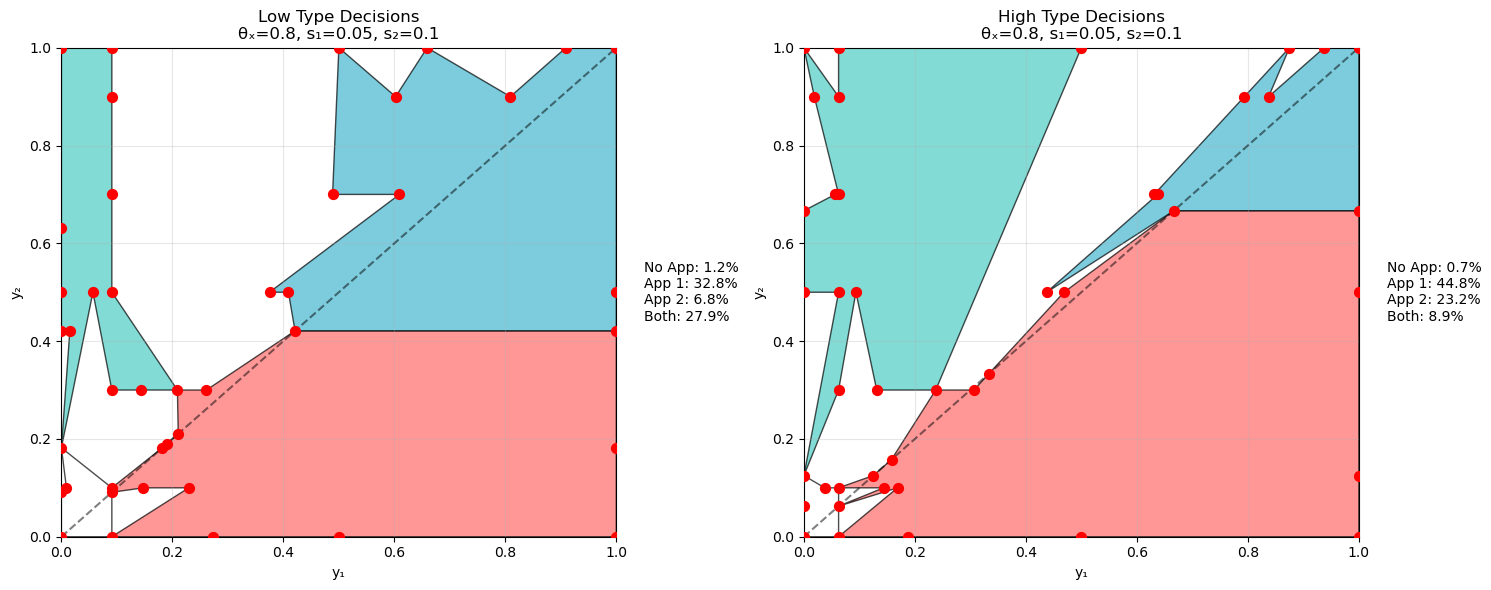


Detailed areas:

Low Type:
Region 0: 1.24%
Region 1: 32.84%
Region 2: 6.79%
Region 3: 27.90%

High Type:
Region 0: 0.67%
Region 1: 44.84%
Region 2: 23.19%
Region 3: 8.88%


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.optimize import fsolve
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Parameters
theta_x = 0.8
s_1 = 0.05
s_2 = 0.1
prob = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]  # [p_0, p_1, p_2, q_0, q_1, q_2]
p_0, p_1, p_2, q_0, q_1, q_2 = prob

def get_utility_funcs(is_high_type):
    def u_0(y1, y2):
        return np.zeros_like(y1) if isinstance(y1, np.ndarray) else 0.0
    
    def u_1(y1, y2):
        if is_high_type:
            return theta_x * ((1 - q_2 - q_0) * y1/2 + (q_2 + q_0) * y1) + (1 - theta_x) * y1 - s_1
        else:
            return theta_x * ((1 - q_2 - q_0) * 0 + (q_2 + q_0) * y1) + (1 - theta_x) * ((1 - p_2 - p_0) * y1/2 + (p_2 + p_0) * y1) - s_1
    
    def u_2(y1, y2):
        if is_high_type:
            return theta_x * ((1 - q_1 - q_0) * y2/2 + (q_1 + q_0) * y2) + (1 - theta_x) * y2 - s_2
        else:
            return theta_x * ((1 - q_1 - q_0) * 0 + (q_1 + q_0) * y2) + (1 - theta_x) * ((1 - p_1 - p_0) * y2/2 + (p_1 + p_0) * y2) - s_2
    
    def u_b_above(y1, y2):
        if is_high_type:
            return (theta_x * (q_0 * y1 + q_1 * (y1/2 + y2/2) + q_2 * y1 + 
                    (1 - q_0 - q_1 - q_2) * (y1/2 + y2/4)) + 
                    (1 - theta_x) * y1) - s_1 - s_2
        else:
            return (theta_x * (q_0 * y1 + q_1 * y2 + q_2 * y1) + 
                    (1 - theta_x) * (p_0 * y1 + p_1 * (y1/2 + y2/2) + p_2 * y1 + 
                    (1 - p_0 - p_1 - p_2) * (y1/2 + y2/4))) - s_1 - s_2

    def u_b_below(y1, y2):
        if is_high_type:
            return (theta_x * (q_0 * y2 + q_1 * (y2/2 + y1/2) + q_2 * y1 + 
                    (1 - q_0 - q_1 - q_2) * (y2/2 + y1/4)) + 
                    (1 - theta_x) * y2) - s_1 - s_2
        else:
            return (theta_x * (q_0 * y2 + q_1 * y2 + q_2 * y1) + 
                    (1 - theta_x) * (p_0 * y2 + p_1 * y2 + p_2 * (y1/2 + y2/2) + 
                    (1 - p_0 - p_1 - p_2) * (y2/2 + y1/4))) - s_1 - s_2
    
    return u_0, u_1, u_2, u_b_above, u_b_below

def find_intersection_points(u_funcs, is_high_type):
    u_0, u_1, u_2, u_b_above, u_b_below = u_funcs
    intersection_points = set()
    
    def find_crossing_diagonal(func1, func2, x0s):
        def equations(vars):
            y1, y2 = vars
            return [
                func1(y1, y2) - func2(y1, y2),
                y1 - y2
            ]
        
        points = set()
        for x0 in x0s:
            try:
                result = fsolve(equations, x0)
                if (0 <= result[0] <= 1 and 0 <= result[1] <= 1 and 
                    abs(result[0] - result[1]) < 1e-6):  # Check it's really on diagonal
                    points.add(tuple(np.round(result, 6)))
            except:
                continue
        return points

    def find_intersections(func1, func2, x0s):
        def equations(vars):
            y1, y2 = vars
            return [func1(y1, y2) - func2(y1, y2), 0]
        
        points = set()
        for x0 in x0s:
            try:
                result = fsolve(equations, x0)
                if 0 <= result[0] <= 1 and 0 <= result[1] <= 1:
                    points.add(tuple(np.round(result, 6)))
            except:
                continue
        return points

    def find_boundary_intersections(func1, func2):
        points = set()
        
        # Check y1 = 0
        def eq_y1_0(y2):
            return func1(0, y2) - func2(0, y2)
        try:
            y2_sols = fsolve(eq_y1_0, [0.5])
            for y2 in y2_sols:
                if 0 <= y2 <= 1:
                    points.add((0, round(y2, 6)))
        except:
            pass
            
        # Check y1 = 1
        def eq_y1_1(y2):
            return func1(1, y2) - func2(1, y2)
        try:
            y2_sols = fsolve(eq_y1_1, [0.5])
            for y2 in y2_sols:
                if 0 <= y2 <= 1:
                    points.add((1, round(y2, 6)))
        except:
            pass

        # Check y2 = 0
        def eq_y2_0(y1):
            return func1(y1, 0) - func2(y1, 0)
        try:
            y1_sols = fsolve(eq_y2_0, [0.5])
            for y1 in y1_sols:
                if 0 <= y1 <= 1:
                    points.add((round(y1, 6), 0))
        except:
            pass

        # Check y2 = 1
        def eq_y2_1(y1):
            return func1(y1, 1) - func2(y1, 1)
        try:
            y1_sols = fsolve(eq_y2_1, [0.5])
            for y1 in y1_sols:
                if 0 <= y1 <= 1:
                    points.add((round(y1, 6), 1))
        except:
            pass
            
        return points

    # Initial guesses spread across the domain
    x0s = [(0.1, 0.1), (0.3, 0.3), (0.5, 0.5), (0.7, 0.7), (0.9, 0.9)]
    
    # Find intersections with diagonal
    utility_pairs = [
        (u_0, u_1), (u_0, u_2), (u_0, u_b_above),
        (u_1, u_2), (u_1, u_b_above), (u_2, u_b_above)
    ]
    
    # Find intersections everywhere including boundaries
    for func1, func2 in utility_pairs:
        # Find internal intersections
        intersection_points.update(find_intersections(func1, func2, x0s))
        # Find boundary intersections
        intersection_points.update(find_boundary_intersections(func1, func2))
        # Find diagonal intersections
        intersection_points.update(find_crossing_diagonal(func1, func2, x0s))

    # Add corners of the unit square
    intersection_points.update({(0,0), (0,1), (1,0), (1,1)})
    
    # Sort points for easier use
    sorted_points = sorted(intersection_points)
    
    return sorted_points

def get_polygon_vertices(points, u_funcs):
    u_0, u_1, u_2, u_b_above, u_b_below = u_funcs
    
    def evaluate_at_point(p):
        y1, y2 = p
        utils = [
            u_0(y1, y2),
            u_1(y1, y2),
            u_2(y1, y2),
            u_b_above(y1, y2) if y1 > y2 else u_b_below(y1, y2)
        ]
        return np.argmax(utils)
    
    # Find small perturbations of points to determine region membership
    eps = 1e-6
    def get_region_around_point(p):
        y1, y2 = p
        points_around = [
            (y1 + eps, y2),
            (y1 - eps, y2),
            (y1, y2 + eps),
            (y1, y2 - eps)
        ]
        decisions = [evaluate_at_point(p) for p in points_around]
        return list(set(decisions))
    
    # Group points by regions
    point_regions = {}
    for p in points:
        regions = get_region_around_point(p)
        point_regions[p] = regions
    
    # Initialize region polygons
    polygons = {i: [] for i in range(4)}  # 0: no app, 1: app1, 2: app2, 3: both
    
    # Function to calculate angle from center point
    def calculate_angle(center, point):
        return np.arctan2(point[1] - center[1], point[0] - center[0])
    
    # Construct polygons for each region
    for region in range(4):
        # Get all points that belong to this region
        region_points = set()
        for p, regions in point_regions.items():
            if region in regions:
                region_points.add(p)
        
        if region_points:
            # Calculate centroid of points
            center = np.mean(list(region_points), axis=0)
            
            # Sort points by angle around centroid
            sorted_points = sorted(region_points, 
                                key=lambda p: calculate_angle(center, p))
            
            # Close the polygon
            if sorted_points[0] != sorted_points[-1]:
                sorted_points.append(sorted_points[0])
            
            polygons[region] = sorted_points
    
    return polygons

def calculate_polygon_area(vertices):
    if not vertices:
        return 0
    
    # Convert to numpy array for easier calculation
    vertices = np.array(vertices)
    
    # Shoelace formula
    x = vertices[:, 0]
    y = vertices[:, 1]
    area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    
    return area

# Create visualization grid and process both types
types = [('Low Type', False), ('High Type', True)]
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#FFFFFF', '#FF6B6B', '#4ECDC4', '#45B7D1']
cmap = ListedColormap(colors)

for (type_name, is_high), ax in zip(types, axes):
    # Get utility functions
    u_funcs = get_utility_funcs(is_high)
    
    # Find intersection points
    intersection_points = list(find_intersection_points(u_funcs, is_high))
    
    # Construct polygons
    polygons = get_polygon_vertices(intersection_points, u_funcs)
    
    # Calculate and plot areas
    areas = {}
    for region, vertices in polygons.items():
        area = calculate_polygon_area(vertices)
        areas[region] = area * 100  # Convert to percentage
        
        if vertices:
            vertices = np.array(vertices)
            path = Path(vertices)
            patch = PathPatch(path, facecolor=colors[region], alpha=0.7)
            ax.add_patch(patch)
    
    # Plot intersection points
    points = np.array(intersection_points)
    ax.scatter(points[:,0], points[:,1], color='red', s=50, zorder=5)
    
    # Plot diagonal line
    ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    
    # Add area annotations
    decision_names = ['No App', 'App 1', 'App 2', 'Both']
    text = '\n'.join([f'{name}: {areas.get(i, 0):.1f}%' 
                      for i, name in enumerate(decision_names)])
    ax.text(1.05, 0.5, text, transform=ax.transAxes, verticalalignment='center')
    
    ax.set_title(f'{type_name} Decisions\nθₓ={theta_x}, s₁={s_1}, s₂={s_2}')
    ax.set_xlabel('y₁')
    ax.set_ylabel('y₂')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Print detailed areas
print("\nDetailed areas:")
for type_name, is_high in types:
    u_funcs = get_utility_funcs(is_high)
    intersection_points = list(find_intersection_points(u_funcs, is_high))
    polygons = get_polygon_vertices(intersection_points, u_funcs)
    
    print(f"\n{type_name}:")
    for region, vertices in polygons.items():
        area = calculate_polygon_area(vertices)
        print(f"Region {region}: {area * 100:.2f}%")